# Import Data and Basic Libraries

In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [108]:
df=pd.read_csv('metro-bike-share-trip-data.csv')
df.head(10)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,NaN,NaN,NaN,NaN,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21784648,14760,2017-03-10T17:38:00.000,2017-03-10T21:44:00.000,3065.0,34.060558,-118.238327,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22506739,79020,2017-03-17T19:20:00.000,2017-03-18T17:17:00.000,3063.0,34.049198,-118.252831,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20889067,86400,2017-02-26T12:18:00.000,2017-02-27T12:36:00.000,3062.0,34.047749,-118.243172,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18481915,600,2017-01-23T18:48:00.000,2017-01-23T18:58:00.000,3082.0,34.046520,-118.237411,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

# Data Cleaning

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Trip ID                            132427 non-null  int64  
 1   Duration                           132427 non-null  int64  
 2   Start Time                         132427 non-null  object 
 3   End Time                           132427 non-null  object 
 4   Starting Station ID                132408 non-null  float64
 5   Starting Station Latitude          132379 non-null  float64
 6   Starting Station Longitude         132379 non-null  float64
 7   Ending Station ID                  132331 non-null  float64
 8   Ending Station Latitude            131376 non-null  float64
 9   Ending Station Longitude           131376 non-null  float64
 10  Bike ID                            132417 non-null  float64
 11  Plan Duration                      1316

In [110]:
df.isna().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                      19
Starting Station Latitude                48
Starting Station Longitude               48
Ending Station ID                        96
Ending Station Latitude                1051
Ending Station Longitude               1051
Bike ID                                  10
Plan Duration                           766
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     33805
Ending Lat-Long                        1051
Neighborhood Councils (Certified)     33837
Council Districts                     33837
Zip Codes                             33837
LA Specific Plans                    116624
Precinct Boundaries                    1099
Census Tracts                          1099
dtype: int64

In [111]:
df.drop(columns=['Starting Lat-Long',
                 'Ending Lat-Long',
                 'Neighborhood Councils (Certified)',
                 'Council Districts',
                 'Zip Codes',
                 'LA Specific Plans',
                 'Precinct Boundaries',
                 'Census Tracts'],
       inplace=True)
df.Duration=df.Duration/60

In [112]:
df.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
0,18222186,251.0,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,5944.0,0.0,One Way,Walk-up
1,9518671,1286.0,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,6603.0,30.0,One Way,Monthly Pass
2,20444932,1440.0,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,5879.0,0.0,One Way,Walk-up
3,20905031,314.0,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,6056.0,0.0,One Way,Walk-up
4,21031476,1440.0,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,6054.0,365.0,One Way,Flex Pass


In [113]:
df.set_index('Trip ID', inplace=True)
df.dropna(inplace=True)
df['Start Time']= pd.to_datetime(df['Start Time'])
df['End Time']=pd.to_datetime(df['End Time'])

df.head()

,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type
Trip ID,,,,,,,,,,,,,
17848847,8.0,2017-01-13 21:32:00,2017-01-13 21:40:00,3082.0,34.046520,-118.237411,3036.0,34.039188,-118.232529,6474.0,0.0,One Way,Walk-up
20700706,9.0,2017-02-24 23:13:00,2017-02-24 23:22:00,3029.0,34.048851,-118.246422,3082.0,34.046520,-118.237411,5794.0,30.0,One Way,Monthly Pass
20595730,14.0,2017-02-23 07:34:00,2017-02-23 07:48:00,3022.0,34.046070,-118.233093,3005.0,34.048550,-118.259048,6604.0,30.0,One Way,Monthly Pass
17307719,7.0,2017-01-05 12:04:00,2017-01-05 12:11:00,3059.0,34.037949,-118.256271,3038.0,34.046822,-118.248352,6035.0,30.0,One Way,Monthly Pass
18941656,14.0,2017-01-30 20:19:00,2017-01-30 20:33:00,3035.0,34.048401,-118.260948,3040.0,34.053570,-118.266357,6728.0,0.0,One Way,Walk-up


In [ ]:
df.describe()

In [114]:
df.loc[df['Starting Station Latitude']==0]['Starting Station ID'].value_counts()

4108.0    32
Name: Starting Station ID, dtype: int64

In [115]:
df.loc[df['Starting Station Longitude']==0]['Starting Station ID'].value_counts()

4108.0    32
Name: Starting Station ID, dtype: int64

In [116]:
df.loc[df['Ending Station Latitude']==0]['Ending Station ID'].value_counts()

4108.0    48
Name: Ending Station ID, dtype: int64

In [117]:
df.loc[df['Ending Station Longitude']==0]['Ending Station ID'].value_counts()

4108.0    48
Name: Ending Station ID, dtype: int64

All of the zeros were recorded at Bike Station 4108, there may be some kind of error related to this particular Bike Station. The values of this bike station's latitude and Longitude can be found in any of the complete values and imputed over the zeros

In [118]:
stat_4108_lat= df.loc[df['Starting Station ID']==4108]['Starting Station Latitude'].max() #use max to avoid the zeros
stat_4108_long= df.loc[df['Starting Station ID']==4108]['Starting Station Longitude'].min()
 #all non-zeroes are the same anyway no need to find and replace
df['Starting Station Latitude'].replace(0,stat_4108_lat,inplace=True)
df['Ending Station Latitude'].replace(0,stat_4108_lat,inplace=True)
df['Starting Station Longitude'].replace(0,stat_4108_long,inplace=True)
df['Ending Station Longitude'].replace(0,stat_4108_long,inplace=True)

In [119]:
df.describe()

,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration
count,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.000000,130715.00000
mean,22.612638,3042.560089,34.047547,-118.250119,3041.994155,34.047061,-118.249841,6193.747504,44.87423
std,78.061097,30.968960,0.006359,0.011476,33.545067,0.006277,0.011982,293.260168,90.41699
min,1.000000,3005.000000,33.987381,-118.472832,3005.000000,33.987381,-118.472832,4727.000000,0.00000
25%,6.000000,3024.000000,34.044170,-118.256980,3023.000000,34.044159,-118.256981,5953.000000,0.00000
50%,10.000000,3039.000000,34.046822,-118.250954,3038.000000,34.046810,-118.250954,6186.000000,30.00000
75%,18.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238810,6434.000000,30.00000
max,1440.000000,4108.000000,34.064281,-118.231277,4108.000000,34.064281,-118.231277,6728.000000,365.00000


Our dataset is now free of missing values

# Geographic Investigation & Visualisation

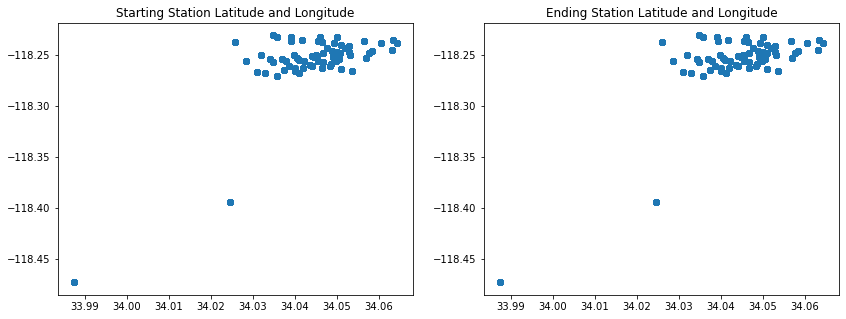

In [120]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(df['Starting Station Latitude'],df['Starting Station Longitude'],alpha=0.3)
plt.title("Starting Station Latitude and Longitude")
plt.subplot(1,2,2)
plt.scatter(df['Ending Station Latitude'],df['Ending Station Longitude'],alpha=0.3)
plt.title("Ending Station Latitude and Longitude")
plt.show()

Matching plots indicate there are no start points that had no drop off and vice-versa this would seem logical

In [ ]:
sorted(df['Starting Station ID'].unique())==sorted(df['Ending Station ID'].unique())

This confirms that the Starting and Ending Stations sets are identical as expected



In [121]:
df.loc[df['Starting Station ID']==3039]['Ending Station ID'].value_counts()

3039.0    77
3009.0    35
Name: Ending Station ID, dtype: int64

In [122]:
df.loc[df['Ending Station ID']==3039]['Starting Station ID'].value_counts()


3039.0    77
3009.0    26
3064.0     6
3005.0     2
3052.0     1
Name: Starting Station ID, dtype: int64

In [123]:
df.loc[df['Starting Station ID']==3009]['Ending Station ID'].value_counts()

3039.0    26
3009.0    25
Name: Ending Station ID, dtype: int64

In [124]:
df.loc[df['Ending Station ID']==3009]['Starting Station ID'].value_counts()

3039.0    35
3009.0    25
3005.0     1
3011.0     1
3027.0     1
3042.0     1
Name: Starting Station ID, dtype: int64

Almost all of the trips made to and from these bike stations are either round trips to the same place or from one of the two to the other. These two stations are almost completely disconnected from the Downtown LA network.

They also only account for a very tiny fraction of the rides total; from over 130k rides just 163 are to or from these two stations, I wonder why that is?

In [125]:
print('The first trip made FROM bike Station 3039 (Culver City) was on : ',df.loc[df['Starting Station ID']==3039]['Start Time'].min())
print('The last trip made FROM bike Station 3039 (Culver City) was on : ',df.loc[df['Starting Station ID']==3039]['Start Time'].max())
print('The first trip made FROM bike Station 3009 (Venice) was on : ',df.loc[df['Starting Station ID']==3009]['Start Time'].min())
print('The last trip made FROM bike Station 309 (Venice) was on : ',df.loc[df['Starting Station ID']==3009]['Start Time'].max())

print('The first trip made TO bike Station 3039 (Culver City) was on : ',df.loc[df['Ending Station ID']==3039]['Start Time'].min())
print('The last trip made TO bike Station 3039 (Culver City) was on : ',df.loc[df['Ending Station ID']==3039]['Start Time'].max())
print('The first trip made TO bike Station 3009 (Venice) was on : ',df.loc[df['Ending Station ID']==3009]['Start Time'].min())
print('The last trip made TO bike Station 309 (Venice) was on : ',df.loc[df['Ending Station ID']==3009]['Start Time'].max())

The first trip made FROM bike Station 3039 (Culver City) was on :  2017-03-26 07:30:00
The last trip made FROM bike Station 3039 (Culver City) was on :  2017-03-26 15:06:00
The first trip made FROM bike Station 3009 (Venice) was on :  2017-03-26 08:30:00
The last trip made FROM bike Station 309 (Venice) was on :  2017-03-26 15:31:00
The first trip made TO bike Station 3039 (Culver City) was on :  2017-03-26 07:30:00
The last trip made TO bike Station 3039 (Culver City) was on :  2017-03-26 15:31:00
The first trip made TO bike Station 3009 (Venice) was on :  2017-03-26 07:45:00
The last trip made TO bike Station 309 (Venice) was on :  2017-03-26 14:11:00


All these the trips to and from Culver City and Venice are on the same day; 2017-03-26 which is the last weekend day of the dataset. What may be the case is that this station was only operational beginning that day (or that weekend)so it was only used on the sunday by people going to and from the beach but these new stations were not used during the week as part of anyone's regular commute. Atl least not yet.

Lets explore some of the distinctive characteristics of these other Bike Stations further:

In [126]:
df['Starting Station ID'].value_counts().tail(10)

3020.0    522
3010.0    419
3060.0    378
3057.0    371
3080.0    187
3045.0    184
3039.0    112
4108.0     53
3009.0     51
3053.0     11
Name: Starting Station ID, dtype: int64

In [127]:
df['Ending Station ID'].value_counts().tail(10)

3028.0    516
3010.0    402
3057.0    395
3060.0    388
3045.0    320
3080.0    175
3039.0    112
4108.0     70
3009.0     64
3053.0     12
Name: Ending Station ID, dtype: int64

Bike Station 4108, which was our station with the apparent logging errors, also has relatively few trips to and from it, from the map it is a little separated from the rest of the downtown set

In [128]:
df.loc[df['Starting Station ID']==4108]['Trip Route Category'].value_counts(normalize=True)

Round Trip    0.735849
One Way       0.264151
Name: Trip Route Category, dtype: float64

In [129]:
df.loc[df['Ending Station ID']==4108]['Trip Route Category'].value_counts(normalize=True)

Round Trip    0.557143
One Way       0.442857
Name: Trip Route Category, dtype: float64

Bike Station ID 4108 is dominantly Round-Trip traffic, this is very unusual for this dataset!

Bike Station 3053 has the least number of rides to and from it but it appears to be right in the mix of things

In [130]:
df.loc[df['Starting Station ID']==3053]['Start Time']

Trip ID
2137435   2016-07-09 12:42:00
2116360   2016-07-09 07:12:00
2321036   2016-07-10 17:42:00
2419838   2016-07-11 07:32:00
2335086   2016-07-10 15:41:00
2019541   2016-07-08 08:39:00
2176181   2016-07-09 19:11:00
2314140   2016-07-10 15:18:00
2062197   2016-07-08 18:22:00
2169928   2016-07-09 18:40:00
2137436   2016-07-09 12:42:00
Name: Start Time, dtype: datetime64[ns]

In [131]:
df.loc[df['Ending Station ID']==3053]['Start Time']

Trip ID
2067007   2016-07-08 19:03:00
2152686   2016-07-09 15:49:00
2066991   2016-07-08 19:33:00
2158281   2016-07-09 16:35:00
2188763   2016-07-09 21:37:00
2426970   2016-07-11 08:05:00
2158278   2016-07-09 16:36:00
2280145   2016-07-10 10:58:00
2170049   2016-07-09 17:50:00
2116315   2016-07-09 07:36:00
1947931   2016-07-07 13:51:00
2188775   2016-07-09 20:55:00
Name: Start Time, dtype: datetime64[ns]

In [132]:
print('The first trip made FROM bike Station 3053 was on : ',df.loc[df['Starting Station ID']==3053]['Start Time'].min())
print('The last trip made FROM bike Station 3053 was on : ',df.loc[df['Starting Station ID']==3053]['Start Time'].max())
print('The first trip made TO bike Station 3053 was on : ',df.loc[df['Ending Station ID']==3053]['Start Time'].min())
print('The last trip made TO bike Station 30053 was on : ',df.loc[df['Ending Station ID']==3053]['Start Time'].max())

The first trip made FROM bike Station 3053 was on :  2016-07-08 08:39:00
The last trip made FROM bike Station 3053 was on :  2016-07-11 07:32:00
The first trip made TO bike Station 3053 was on :  2016-07-07 13:51:00
The last trip made TO bike Station 30053 was on :  2016-07-11 08:05:00


All trips made over just 5 days from the 7th of July 2016 (the first day of the dataset) to the 11th of July 2016. Is it possible this Bike Station was decomissioned?

# Time Series Investigation & Visualisation

In [133]:
df['Start Time'].min()

Timestamp('2016-07-07 04:17:00')

In [134]:
df['Start Time'].max()

Timestamp('2017-03-31 23:45:00')

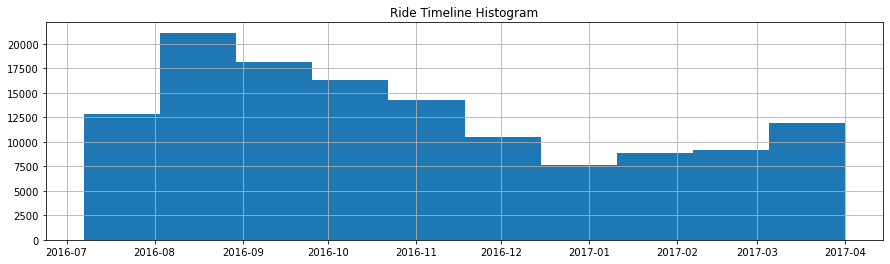

In [135]:
df['Start Time'].hist(figsize=(15,4))
plt.title('Ride Timeline Histogram')
plt.show()

Rides data is assumed to be complete over the timeperiod starting from the 7th of July 2016 to the 31st of March 2017. In the above histogram we can see the growth in popularity over the summer months. Ridership declines as summer turns into autumn turns into winter dropping to its lowest point in wht we would expect to be the coldest part of winter of 2017 and the nincreasing as spring begins to arrive. Unfortunately the time period encompasses less than 1 year so we are unable to observe a full cyclical seasonality on ridership

In [136]:
df['Start Month']=df['Start Time'].dt.month_name()

df['Start Month'].value_counts()

August       24167
September    19852
October      17863
November     14196
March        13564
July         11420
December     10327
January      10053
February      9273
Name: Start Month, dtype: int64

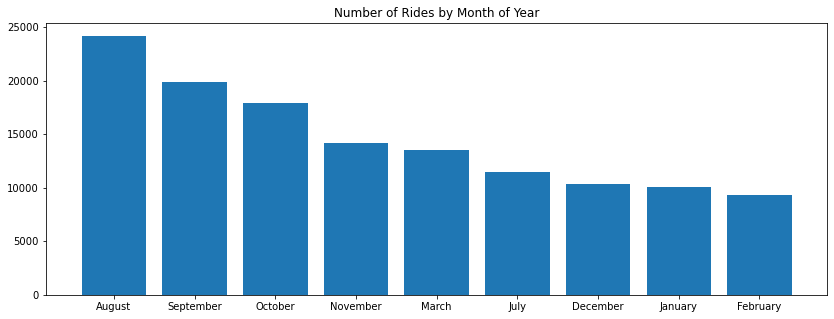

In [137]:
plt.figure(figsize=(14,5))
plt.bar(df['Start Month'].value_counts().index,df['Start Month'].value_counts().values)
plt.title('Number of Rides by Month of Year')
plt.show()

In [138]:
df['Start Day']=df['Start Time'].dt.day_name()
df['Start Day'].value_counts()

Thursday     20105
Friday       19805
Wednesday    19574
Tuesday      18897
Saturday     18273
Monday       17060
Sunday       17001
Name: Start Day, dtype: int64

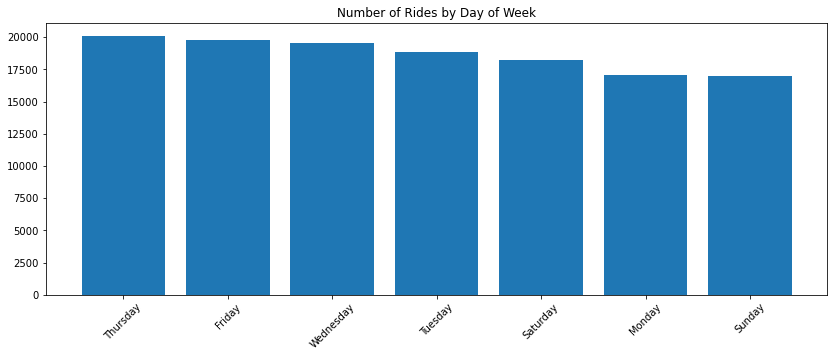

In [139]:
plt.figure(figsize=(14,5))

plt.bar(df['Start Day'].value_counts().index,df['Start Day'].value_counts().values)
plt.xticks(rotation=45)
plt.title('Number of Rides by Day of Week')
plt.show()

Ridership does vary by day of the week but without a clear weekday vs weekend divide

Just the time string data is isolated from the datetime provided in Start Time and is rounded off to the nearest hour to ease our analysis

In [140]:
df['Time Only']= df['Start Time'].dt.round('H')
df['Time Only']=pd.to_datetime(df['Time Only'],format= '%H:%M:%S' ).dt.time
df.head()

,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Start Month,Start Day,Time Only
Trip ID,,,,,,,,,,,,,,,,
17848847,8.0,2017-01-13 21:32:00,2017-01-13 21:40:00,3082.0,34.046520,-118.237411,3036.0,34.039188,-118.232529,6474.0,0.0,One Way,Walk-up,January,Friday,22:00:00
20700706,9.0,2017-02-24 23:13:00,2017-02-24 23:22:00,3029.0,34.048851,-118.246422,3082.0,34.046520,-118.237411,5794.0,30.0,One Way,Monthly Pass,February,Friday,23:00:00
20595730,14.0,2017-02-23 07:34:00,2017-02-23 07:48:00,3022.0,34.046070,-118.233093,3005.0,34.048550,-118.259048,6604.0,30.0,One Way,Monthly Pass,February,Thursday,08:00:00
17307719,7.0,2017-01-05 12:04:00,2017-01-05 12:11:00,3059.0,34.037949,-118.256271,3038.0,34.046822,-118.248352,6035.0,30.0,One Way,Monthly Pass,January,Thursday,12:00:00
18941656,14.0,2017-01-30 20:19:00,2017-01-30 20:33:00,3035.0,34.048401,-118.260948,3040.0,34.053570,-118.266357,6728.0,0.0,One Way,Walk-up,January,Monday,20:00:00


In [143]:
def to_hour_int(x):
    #convert hh:mm:ss to hh integar
    x=str(x)
    x=x[:2]
    x=int(x)
    return x

In [144]:
df['Time Only Int']=df['Time Only']
df['Time Only Int']=df['Time Only Int'].astype('str')
df['Time Only Int']=df['Time Only Int'].apply(lambda x: to_hour_int(x))

In [145]:
df['Peak']=1
df.loc[df['Time Only Int']>20.5,'Peak']=0
df.loc[df['Time Only Int']<7.5,'Peak']=0
df.loc[(df['Start Day']=='Saturday')&(df['Time Only Int']<9.5),'Peak']=0
df.loc[(df['Start Day']=='Sunday')&(df['Time Only Int']<9.5),'Peak']=0

df['Peak'].describe()

count    130715.000000
mean          0.811797
std           0.390876
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Peak, dtype: float64

1    0.811797
0    0.188203
Name: Peak, dtype: float64


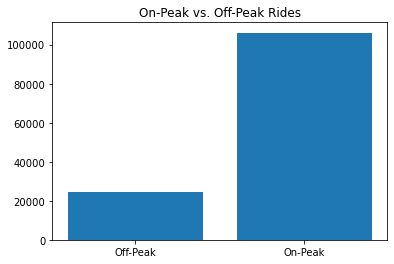

In [146]:
print(df.Peak.value_counts(normalize=True))
plt.bar(df.Peak.value_counts().index,df.Peak.value_counts().values)
plt.xticks(ticks=[0,1],labels=['Off-Peak','On-Peak'])
plt.title('On-Peak vs. Off-Peak Rides')
plt.show()

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130715 entries, 17848847 to 5250466
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Duration                    130715 non-null  float64       
 1   Start Time                  130715 non-null  datetime64[ns]
 2   End Time                    130715 non-null  datetime64[ns]
 3   Starting Station ID         130715 non-null  float64       
 4   Starting Station Latitude   130715 non-null  float64       
 5   Starting Station Longitude  130715 non-null  float64       
 6   Ending Station ID           130715 non-null  float64       
 7   Ending Station Latitude     130715 non-null  float64       
 8   Ending Station Longitude    130715 non-null  float64       
 9   Bike ID                     130715 non-null  float64       
 10  Plan Duration               130715 non-null  float64       
 11  Trip Route Category         130

# Ride Duration and Type Investigation

In [148]:
df['Trip Route Category'].value_counts()

One Way       118086
Round Trip     12629
Name: Trip Route Category, dtype: int64

In [149]:
df['Trip Route Category'].value_counts(normalize=True)

One Way       0.903385
Round Trip    0.096615
Name: Trip Route Category, dtype: float64

In [150]:
df['Passholder Type'].value_counts()

Monthly Pass    80513
Walk-up         40749
Flex Pass        9453
Name: Passholder Type, dtype: int64

In [151]:
df['Passholder Type'].value_counts(normalize=True)

Monthly Pass    0.615943
Walk-up         0.311739
Flex Pass       0.072318
Name: Passholder Type, dtype: float64

In [152]:
df['Plan Duration'].value_counts()

30.0     80513
0.0      40749
365.0     9453
Name: Plan Duration, dtype: int64

In [153]:
df.drop(columns=['Plan Duration'],inplace=True)

In [154]:
len(df['Bike ID'].unique())

762

762 individual bikes in the system

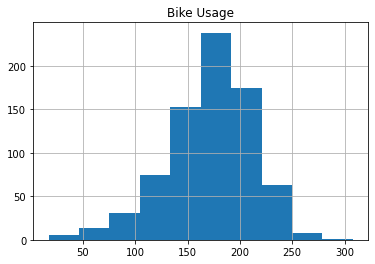

In [155]:
df['Bike ID'].value_counts().hist()
plt.title('Bike Usage')
plt.show()

Distribution of Bike usage appears normal indicating the bikes are all used randomly. This is to be expected but we can also expect the particular bike ridden to be of little use to our machine learning models

In [156]:
df.groupby('Trip Route Category')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Trip Route Category,,,,,,,,
One Way,118086.0,19.129380,69.423967,1.0,6.0,10.0,16.0,1440.0
Round Trip,12629.0,55.182437,129.736237,1.0,15.0,28.0,53.0,1440.0


In [157]:
df.groupby('Passholder Type')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Passholder Type,,,,,,,,
Flex Pass,9453.0,17.920766,65.245438,1.0,7.0,10.0,15.0,1440.0
Monthly Pass,80513.0,12.958131,41.893859,1.0,5.0,8.0,13.0,1440.0
Walk-up,40749.0,42.776706,120.399684,1.0,11.0,19.0,34.0,1440.0


Monthly Pass Holder tend to take much shorter rides but take many more of them. An excellent indication of a low barrier to riding. Walk up riders that only use the bike share system occasionally tend to take longer rides, this would be the type of pass Iespect to be held by a tourist, leisurely riding around downtown LA

In [158]:
df.groupby('Passholder Type')['Trip Route Category'].value_counts(normalize=True)

Passholder Type  Trip Route Category
Flex Pass        One Way                0.949011
                 Round Trip             0.050989
Monthly Pass     One Way                0.954020
                 Round Trip             0.045980
Walk-up          One Way                0.792756
                 Round Trip             0.207244
Name: Trip Route Category, dtype: float64

In [159]:
df.groupby('Peak')['Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Peak,,,,,,,,
0,24601.0,27.885289,98.083181,1.0,6.0,11.0,19.0,1440.0
1,106114.0,21.390250,72.581309,1.0,6.0,10.0,17.0,1440.0


In [160]:
df.groupby('Peak')['Trip Route Category'].value_counts(normalize=True)

Peak  Trip Route Category
0     One Way                0.879192
      Round Trip             0.120808
1     One Way                0.908994
      Round Trip             0.091006
Name: Trip Route Category, dtype: float64

In [161]:
df.groupby('Peak')['Passholder Type'].value_counts(normalize=True)

Peak  Passholder Type
0     Monthly Pass       0.555628
      Walk-up            0.381163
      Flex Pass          0.063209
1     Monthly Pass       0.629926
      Walk-up            0.295644
      Flex Pass          0.074429
Name: Passholder Type, dtype: float64

Interestingly On-Peak and Off-Peak riding times did not see a difference in ride Duration or Trip Route Category. The proportion of Monthly Pass holders riding is higher during On-Peak hours and Walk-Up riders are a higher proportion of Off-Peak riders.

In [162]:
df.Duration.value_counts(normalize=True).head(10)

6.0     0.072976
7.0     0.071468
5.0     0.068362
8.0     0.067628
9.0     0.058601
4.0     0.055694
10.0    0.053360
11.0    0.046835
12.0    0.041434
13.0    0.037035
Name: Duration, dtype: float64

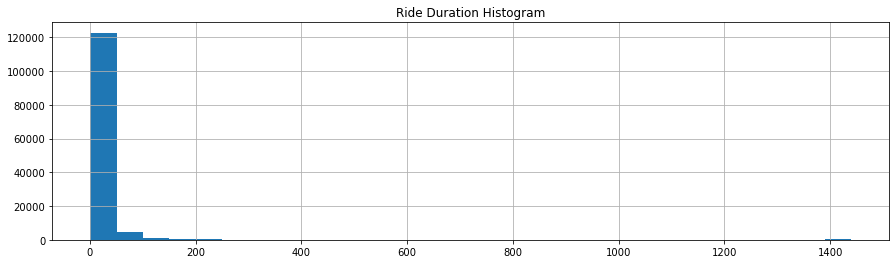

In [163]:
plt.figure(figsize=(15,4))
df.Duration.hist(bins=29)
plt.title('Ride Duration Histogram')
plt.show()

In [ ]:
plt.figure(figsize=(15,4))
df.loc[df['Duration']<30].Duration.hist(bins=29)
plt.title('Ride Duration for rides less than 30 minutes')
plt.show()

In [164]:
round(len(df.loc[df.Duration<31])/len(df),2)

0.89

89% of rides are 30 minutes or less. All rides longer than 30 minutes will be rounded down to 30 to prevent the long tail from exerting undue influence on our machine learning models.

In [165]:
df['Duration']=df['Duration'].clip(upper=30)

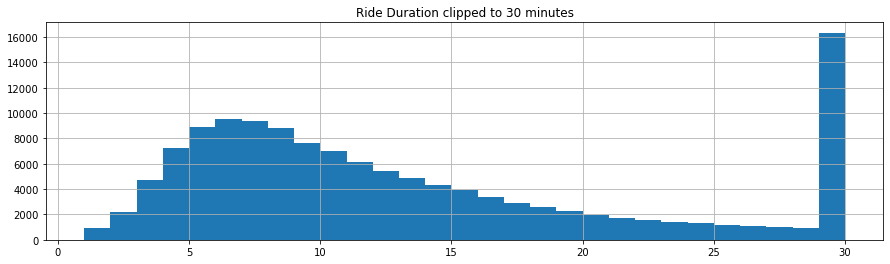

In [166]:
plt.figure(figsize=(15,4))
df.Duration.hist(bins=29)
plt.title('Ride Duration clipped to 30 minutes')
plt.show()
# plt.vlines(x=15,ymin=0,ymax=10000,color='red')
# plt.vlines(x=10,ymin=0,ymax=10000,color='red')
# plt.vlines(x=5,ymin=0,ymax=10000,color='red')
# plt.ylim(0,30000)
# plt.xlim(0,5000)

# Map visualization

In [106]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [59]:
import folium
bike_map1=folium.Map([df['Starting Station Latitude'].values[0],df['Starting Station Longitude'].values[0]])
for station in df['Starting Station ID'].unique():
    lat=df.loc[df['Starting Station ID']==station]['Starting Station Latitude'].values[0]
    lon=df.loc[df['Starting Station ID']==station]['Starting Station Longitude'].values[0]
    marker=folium.Marker([lat,lon],popup=str(station))
    marker.add_to(bike_map1)

bike_map1